# **Exploratory Data Analysis on Bike Sharing in Washington D.C. Dataset**

By: Andrea Rose V. Franco (andrearosefranco@gmail.com)

Link to dataset used: https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset/data



## **Import the data from Kaggle**

The public dataset contains two files:

- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv : bike sharing counts aggregated on daily basis. Records: 731 days

In [1]:
import kagglehub

path = kagglehub.dataset_download("marklvl/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bike-sharing-dataset


## **Exploring the dataset contents**

After importing the dataset, I first inspected what it contains and how large the dataset is. I do this for both the daily data and hourly data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [3]:
#View the daily file
data_day = pd.read_csv(path + "/day.csv")
print(f'Dataset size: {data_day.shape}')
data_day.head()

Dataset size: (731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#View the hourly file
data_hour = pd.read_csv(path + "/hour.csv")
print(f'Dataset size: {data_hour.shape}')
data_hour.head()

Dataset size: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


We can see that we have 13 features corresponding to casual, registered, and total count of users. From the readme.txt of the file, the following are the description of each column in the dataset:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered




## **Time-series Analysis**

I first explored the time-series data and observed how the number of casual, registered, and total users change from 2011 to 2012 per month.

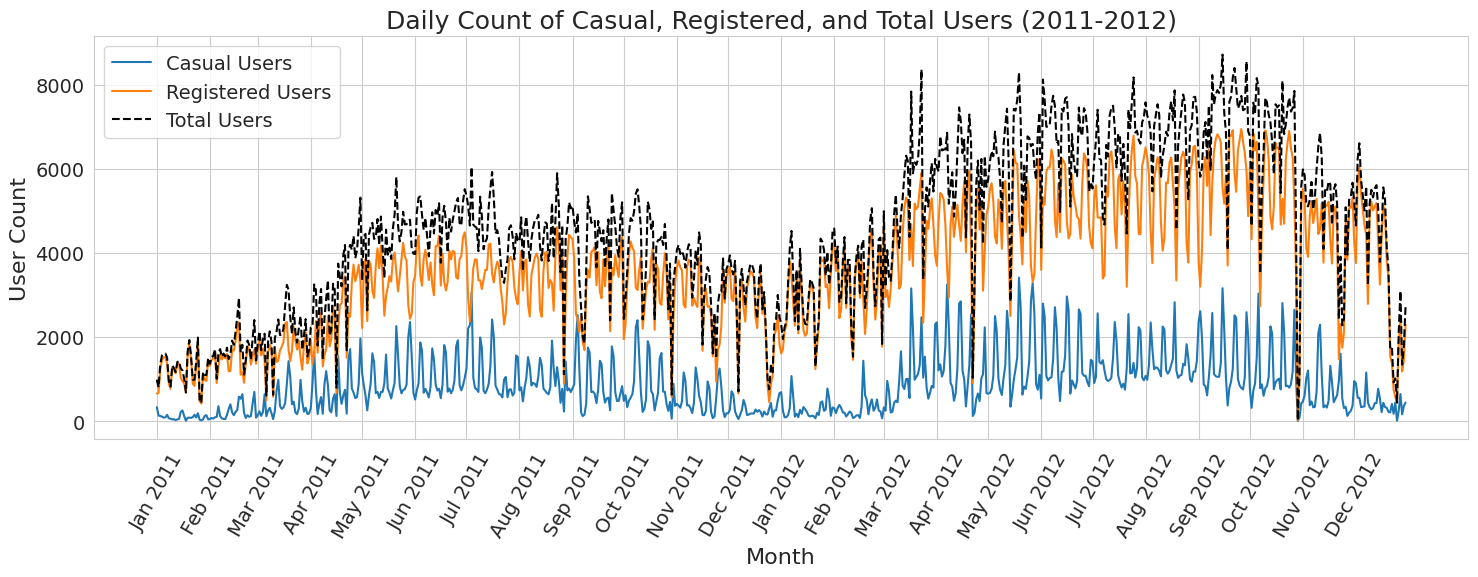

In [5]:
plt.figure(figsize=(15, 6))
plt.rc('font', size=14)
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
sns.lineplot(x=data_day['dteday'], y=data_day['casual'], label='Casual Users')
sns.lineplot(x=data_day['dteday'], y=data_day['registered'], label='Registered Users')
sns.lineplot(x=data_day['dteday'], y=data_day['cnt'], label='Total Users', linestyle='--', color='black')
plt.title('Daily Count of Casual, Registered, and Total Users (2011-2012)', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('User Count', fontsize=16)
ax = plt.gca()
monthly_ticks = data_day['dteday'].dt.to_period('M').drop_duplicates().dt.to_timestamp()
monthly_labels = pd.DatetimeIndex(monthly_ticks).strftime('%b %Y')
ax.set_xticks(monthly_ticks)
ax.set_xticklabels(monthly_labels, rotation=60)
plt.legend()
plt.tight_layout()
plt.show()

An increase in total users was observed from 2011 to 2012. We can also observe that user count are higher during the middle of the year for both 2011 and 2012.

To further quantify this, I plotted the average daily users bar plot as follows:

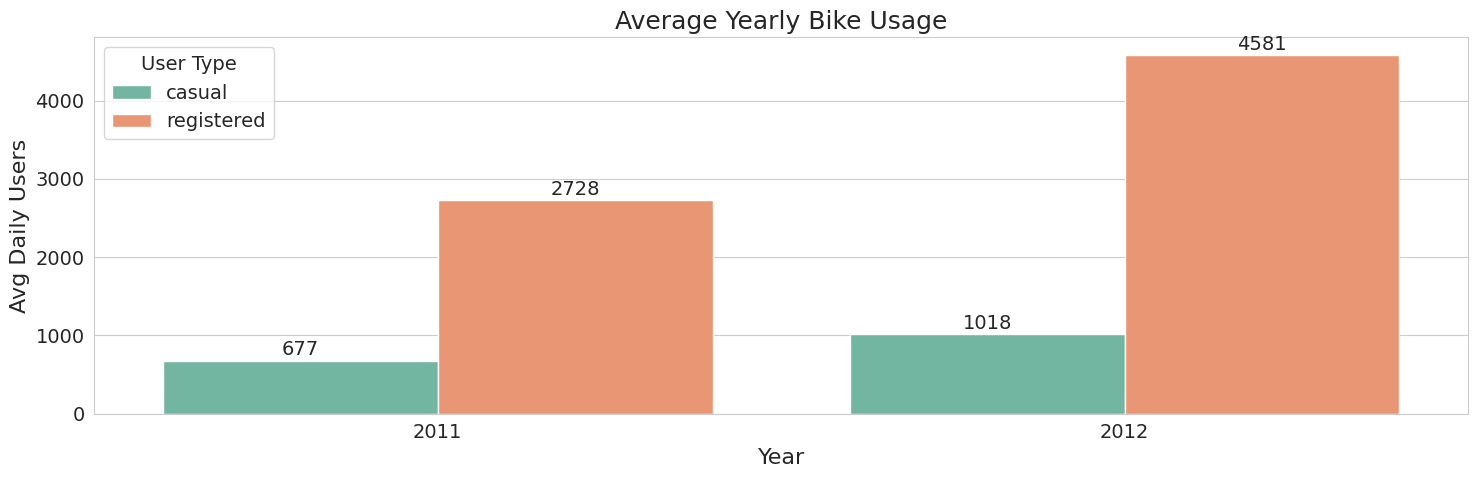

In [6]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_day['year'] = data_day['dteday'].dt.year
yearly_avg = data_day.groupby('year')[['casual', 'registered']].mean().reset_index()
yearly_melted = yearly_avg.melt(id_vars='year', var_name='User Type', value_name='Average Daily Count')
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='year', y='Average Daily Count', hue='User Type', data=yearly_melted, palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=1)

plt.title('Average Yearly Bike Usage', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Avg Daily Users', fontsize=16)
plt.tight_layout()
plt.show()

 I used the average number of users per day instead of the total sum to ensure fair comparison. The average number accounts for variations in time periods and avoids inflating results due to users making multiple rentals.

The bar plot shows a significant increase in bike usage from 2011 to 2012:
- Casual users increased from 677 to 1018 per day on average.
- Registered users increased from 2728 to 4581 per day.

This suggests growing usage of the bike-sharing system from 2011 to 2012.

### **Average Hourly Bike Usage by Weekday**

Now that we have seen the user counts, let's move forward onto looking into the different features. Here, I plotted the average hourly usage per week to see at which days and time of the day the bikes are used. In here, I compared the casual and registered counts.

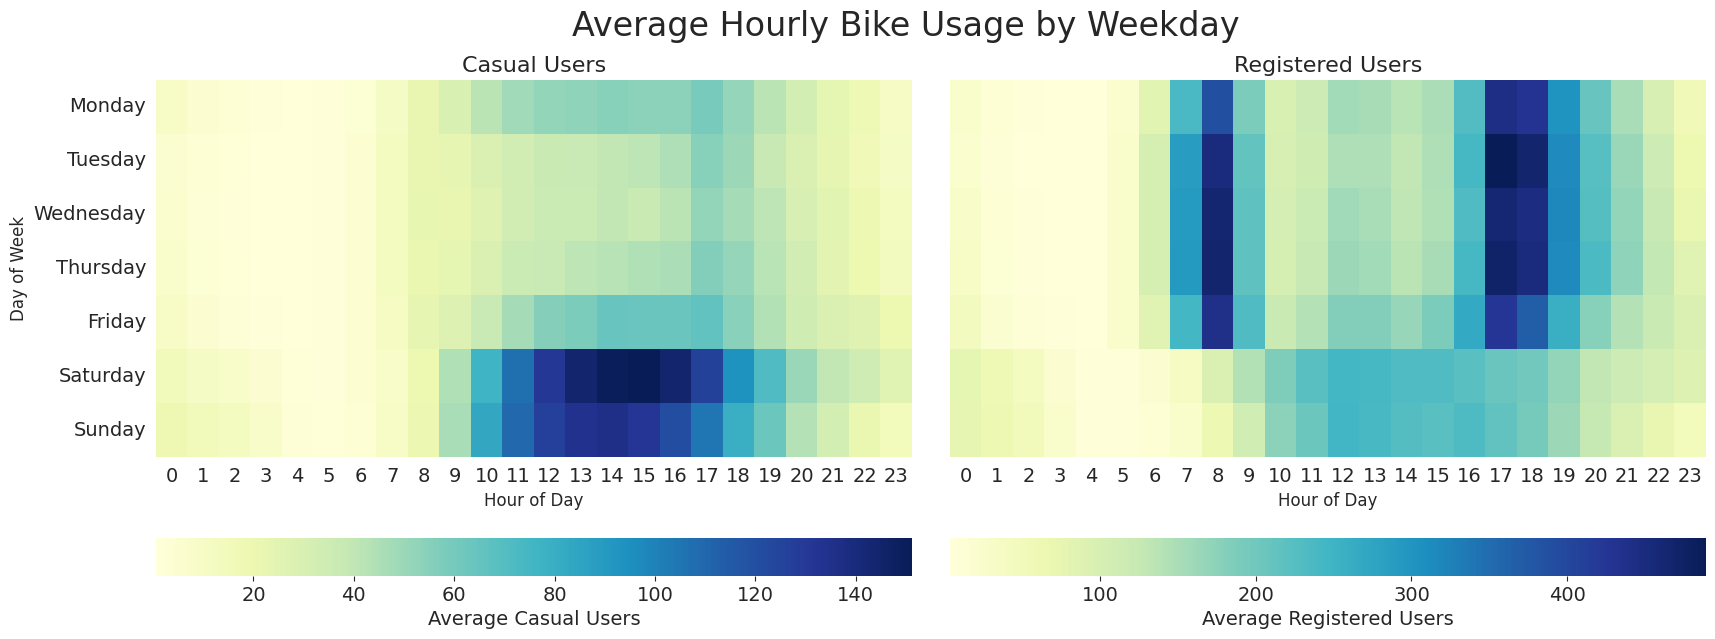

In [7]:
heatmap_data = data_hour.copy()
heatmap_data['weekday'] = pd.to_datetime(heatmap_data['dteday']).dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_casual = heatmap_data.pivot_table(index='weekday', columns='hr', values='casual', aggfunc='mean')
pivot_registered = heatmap_data.pivot_table(index='weekday', columns='hr', values='registered', aggfunc='mean')
pivot_casual = pivot_casual.reindex(weekday_order)
pivot_registered = pivot_registered.reindex(weekday_order)

#Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True, gridspec_kw={'wspace': 0.05})
fig.suptitle('Average Hourly Bike Usage by Weekday', fontsize=24)

#Casual
sns.heatmap(pivot_casual, cmap='YlGnBu', ax=axes[0], cbar_kws={"orientation": "horizontal", "label": "Average Casual Users"})
axes[0].set_title('Casual Users', fontsize=16)
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Day of Week', fontsize=12)

#Registered
sns.heatmap(pivot_registered, cmap='YlGnBu', ax=axes[1], cbar_kws={"orientation": "horizontal", "label": "Average Registered Users"})
axes[1].set_title('Registered Users', fontsize=16)
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

The casual data shows high concentration of users during the weekends, in particular from 9:00 to 17:00. The peak is shown at 14:00 during Saturdays. This suggests that casual users primarily use the bike service for leisure or recreational purposes on weekends.


For the registered users, we can observe high values from Monday to Friday at 7:00 - 9:00 and 17:00 - 18:00. This would suggest that registered users most likely use the bikes from home to work, and would travel at those times. They rely on bikes for daily transportation. The drop in usage during weekends supports the idea that registered users use it for functionality rather than for recreational.




### **Average Daily Bike Usage by Month**

After looking at the hourly and daily usage, we can look at the bigger picture by plotting the average daily bike usage per month. In here, I used the total counts.

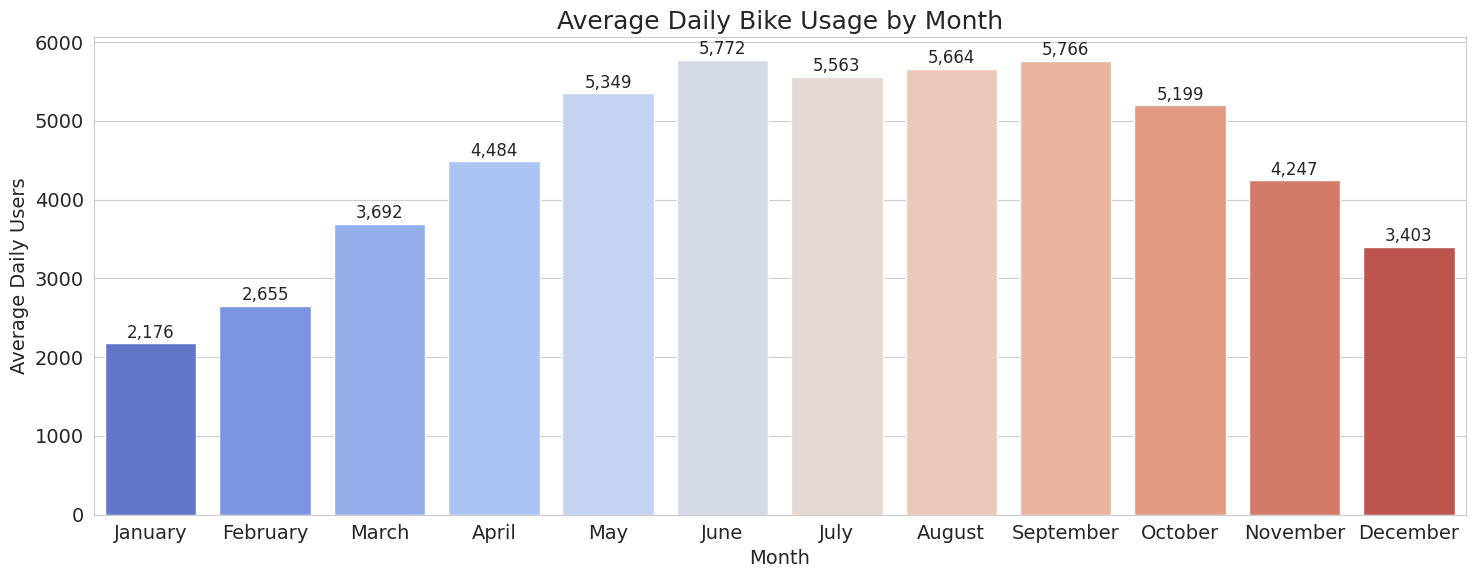

In [8]:
data_hour['date'] = pd.to_datetime(data_hour['dteday'])
daily_usage = data_hour.groupby('date')['cnt'].sum().reset_index()
daily_usage['month'] = daily_usage['date'].dt.month
monthly_avg = daily_usage.groupby('month')['cnt'].mean().reset_index()
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])
monthly_avg = monthly_avg.sort_values('month')
plt.figure(figsize=(15, 6))
sns.barplot(x='month_name', y='cnt', data=monthly_avg, palette='coolwarm')
for index, row in monthly_avg.iterrows():
    plt.text(index, row['cnt'] + 20, f'{int(row["cnt"]):,}', ha='center', va='bottom', fontsize=12)

plt.title('Average Daily Bike Usage by Month', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Average Daily Users')
plt.tight_layout()
plt.show()

In this bar plot, we can see that June has the highest number of bike usage, followed by September. Most high values can be found during the middle of the year, while low average values are observed in January and February.

### **Season and Weather**

We can analyze the monthly user data further by looking at the season and weather. I plotted the average daily user for both.

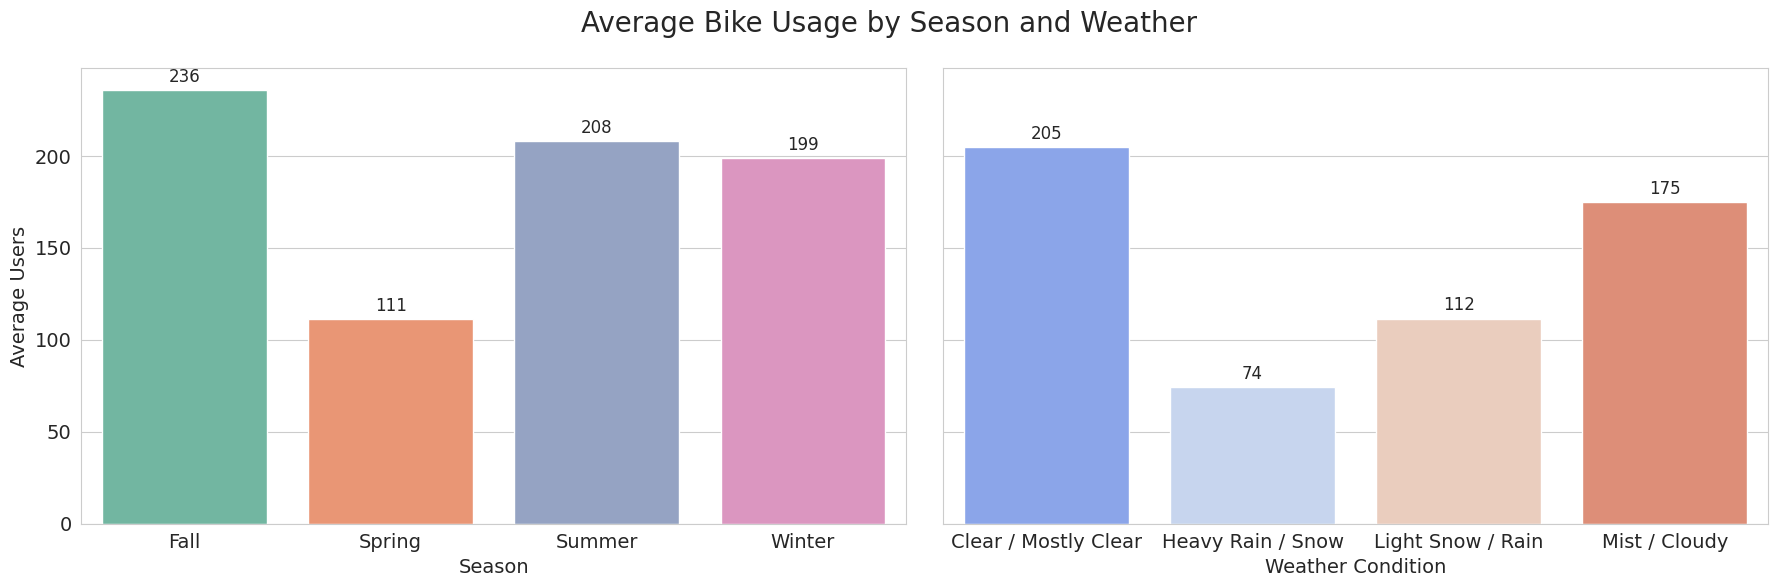

In [9]:
#Mapping for weather and season
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

weather_labels = {
    1: 'Clear / Mostly Clear',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Rain',
    4: 'Heavy Rain / Snow'
}


#Map descriptive labels
data_hour['season_desc'] = data_hour['season'].map(season_labels)
data_hour['weather_desc'] = data_hour['weathersit'].map(weather_labels)

avg_season = data_hour.groupby('season_desc')['cnt'].mean().reset_index()
avg_weather = data_hour.groupby('weather_desc')['cnt'].mean().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
fig.suptitle('Average Bike Usage by Season and Weather', fontsize=20)

#Season
season_plot = sns.barplot(x='season_desc', y='cnt', data=avg_season, palette='Set2', ax=axes[0])
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Average Users')
axes[0].tick_params(axis='x', rotation=0)
for container in season_plot.containers:
    season_plot.bar_label(container, fmt='%.0f', padding=3, fontsize=12)

#Weather situation
weather_plot = sns.barplot(x='weather_desc', y='cnt', data=avg_weather, palette='coolwarm', ax=axes[1])
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Average Users')
axes[1].tick_params(axis='x', rotation=0)
for container in weather_plot.containers:
    weather_plot.bar_label(container, fmt='%.0f', padding=3, fontsize=12)

plt.tight_layout()
plt.show()


Most bike users are found during the fall, which coincides with the high average users during the month of September. In contrast, the lowest usage is observed during spring, possibly due to unpredictable weather patterns or transitional seasonal behavior.

People prefer to use bikes in clear or mostly clear weather. When the weather gets worse, like during heavy rain or snow, bike usage decreases.



### **Temperature, Feels like temperature, Humidity, and Windspeed**

Here I plot the four other features. I used a regression plot since the values are continuous and so I can be able to observe the trend.

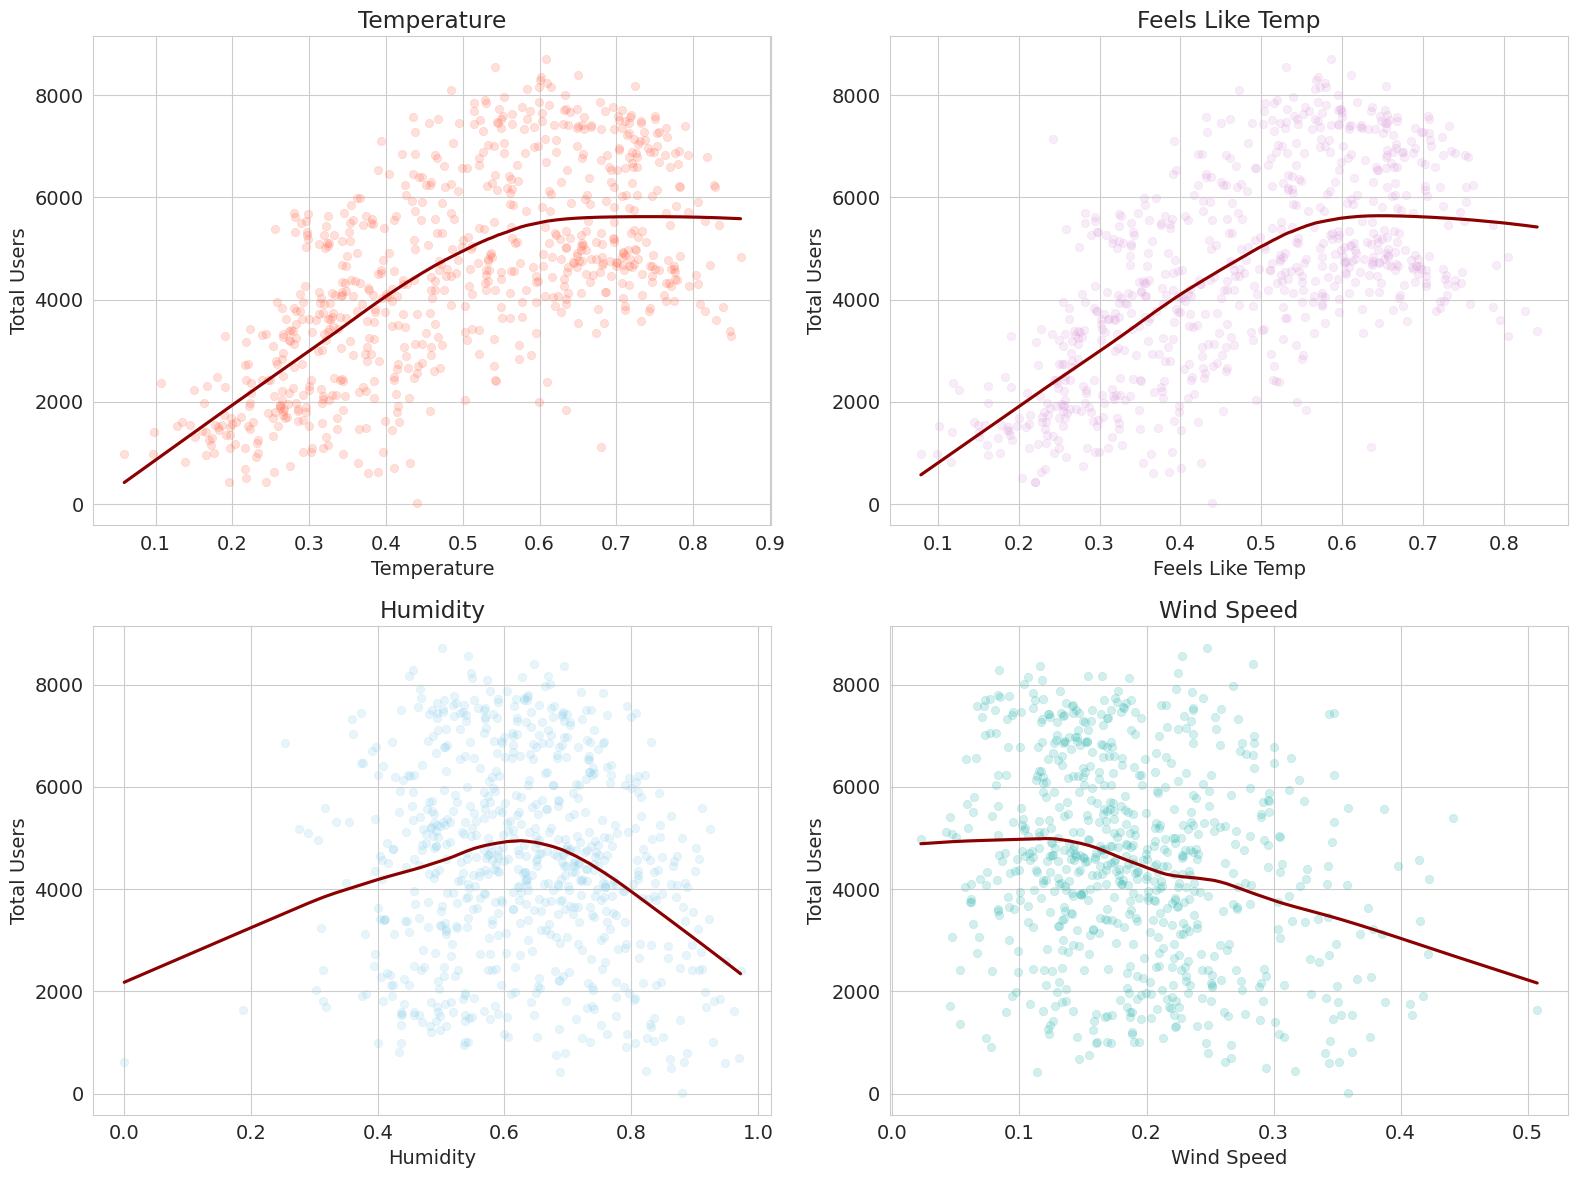

In [10]:
features = ['temp', 'atemp', 'hum', 'windspeed']
titles = ['Temperature', 'Feels Like Temp', 'Humidity', 'Wind Speed']
colors = ['tomato', 'plum', 'skyblue', 'lightseagreen']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()
for i, (feature, title, color) in enumerate(zip(features, titles, colors)):
    sns.scatterplot(x=feature, y='cnt', data=data_day, alpha=0.2, ax=axes[i], color=color, edgecolor=None)
    sns.regplot(x=feature, y='cnt', data=data_day, scatter=False, ax=axes[i], color='darkred', lowess=True)
    axes[i].set_title(f'{title}')
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Total Users')
plt.tight_layout()
plt.show()



I summarize the plot findings as follows:
- For the normalized temperature, we can see that users increase as the normalize temperature reaches 0.6. It then starts to plateau after that.
- The same trend is seen for the feels like temperature, however, it started to gradually decrease after normalized atemperature of 0.6.
- For humidity, bike usage grows steadily up to a humidity level of about 0.6 to 0.7, but starts to decline beyond that point, suggesting that high humidity may discourage usage.
- Lastly, wind speed shows an inverse relationship with bike usage, where the number of users consistently decreases as wind speed increases, likely due to discomfort or increased difficulty in biking under windy conditions.

# **Predicting total users using machine learning models**

I can train a model using the different features that may contribute to the number of total users. I used different machine learning algorithms and did a comparison.

I compared the following:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting
- K-Nearest Neighbor
- Support Vector Regressor
- Multilayer Perceptron Regressor

I then use SHapley Additive exPlanations (SHAP) to the best model to interpret the model predictions.

Limitations: Due to time constraints, this analysis did not use tools such as GridSearchCV to tune the parameters for optimization. The parameters are arbitarily set or the default is used.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [12]:
#Define features/target
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target = 'cnt'

X = data_hour[features]
y = data_hour[target]

#Train-validation-test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(),
    'MLP': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}


results = []
trained_models = {}

for name, model in models.items():
    use_scaled = name in ['SVR', 'KNN', 'MLP']
    X_tr = X_train_scaled if use_scaled else X_train
    X_vl = X_val_scaled if use_scaled else X_val
    X_ts = X_test_scaled if use_scaled else X_test

    model.fit(X_tr, y_train)
    trained_models[name] = model
    val_pred = model.predict(X_vl)
    test_pred = model.predict(X_ts)

    results.append({
        'Model': name,
        'Val R2': r2_score(y_val, val_pred),
        'Test R2': r2_score(y_test, test_pred),
        'Val MAE': mean_absolute_error(y_val, val_pred),
        'Test MAE': mean_absolute_error(y_test, test_pred),
        'Val RMSE': np.sqrt(mean_squared_error(y_val, val_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, test_pred)),
    })

,Model,Val R2,Test R2,Val MAE,Test MAE,Val RMSE,Test RMSE,Shortcut Model
2,Random Forest,0.943422,0.941122,26.009949,25.561431,42.891599,43.178668,RF
6,MLP,0.902658,0.897641,38.529024,38.356573,56.259711,56.931806,MLP
1,Decision Tree,0.894263,0.866257,34.652474,37.051496,58.635776,65.077145,DT
3,Gradient Boosting,0.854263,0.852114,46.841820,46.276315,68.838896,68.431416,GB
4,KNN,0.621909,0.616621,75.036018,74.541715,110.878317,110.181039,KNN
0,Linear Regression,0.395408,0.387282,105.554684,104.981072,140.210247,139.290903,LR
5,SVR,0.385658,0.379524,91.859682,91.011469,141.336223,140.169960,SVR


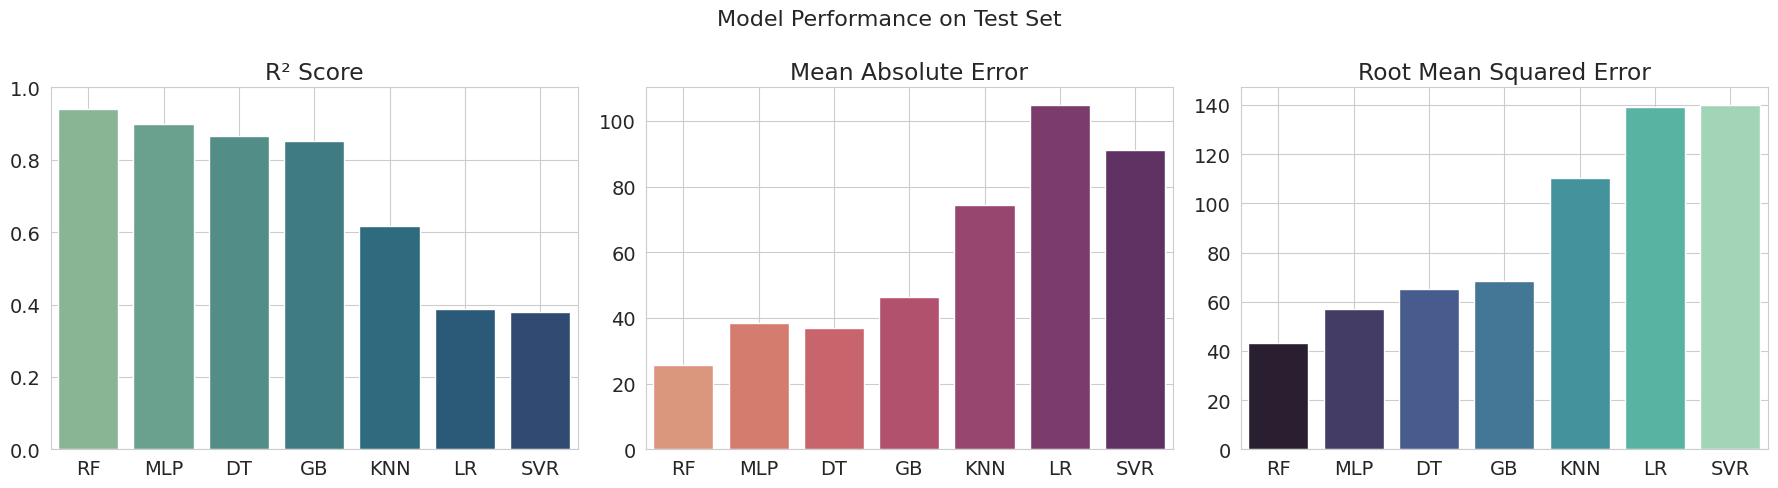

In [13]:
shortcut_names = {
    'Linear Regression': 'LR',
    'Decision Tree': 'DT',
    'Random Forest': 'RF',
    'Gradient Boosting': 'GB',
    'KNN': 'KNN',
    'SVR': 'SVR',
    'MLP': 'MLP'
}

results_df = pd.DataFrame(results)
results_df['Shortcut Model'] = results_df['Model'].map(shortcut_names)
results_df = results_df.sort_values(by='Test R2', ascending=False)
display(results_df)


fig, axs = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Model Performance on Test Set', fontsize=16)

sns.barplot(data=results_df, x='Shortcut Model', y='Test R2', ax=axs[0], palette='crest')
axs[0].set_title('R² Score')
axs[0].set_ylim(0, 1)

sns.barplot(data=results_df, x='Shortcut Model', y='Test MAE', ax=axs[1], palette='flare')
axs[1].set_title('Mean Absolute Error')

sns.barplot(data=results_df, x='Shortcut Model', y='Test RMSE', ax=axs[2], palette='mako')
axs[2].set_title('Root Mean Squared Error')

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True)

plt.tight_layout()
plt.show()


From the model comparisons, we can see that Random Forest (RF) outperformed all other models in the R squared score, MAE, and RMSE. We can also see that linear regression and support vector regression resulted in lowest R squared and RMSE.


Because of these results, I used an explainable AI using the best model from the options, which is the Random Forest model.

#### **SHAP Analysis**

SHAP is an XAI method developed by Lundberg and Lee (2017) to explain the predictions made by a model. It calculates the contribution of each feature by decomposing the prediction into a linear combination \cite{PiMLToolbox}
$$
  g(z') = \phi_0 + \sum_{j=1}^{p}{\phi_j}{z'_j},
$$
 where $g(z')$ is the explanation method,  $\phi_0$ is the base value without features, $p$ is the number of features, $\phi_j$ denotes the SHAP value to feature $j$, and $z_j'$ are binary indicators denoting feature presence. The SHAP value $\phi_j$ for feature $j$ is defined as:
$$
 \phi_j = \sum_{S \subseteq N \setminus \{j\}} \frac{|S|! (p - |S| - 1)!}{p!} \left[ f(S \cup \{j\}) - f(S) \right],
$$
 where $S$ is a subset of features not containing $j$, $N$ is the set of all features, $p$ is the total number of features, and $f(S)$ is the model prediction when only features in $S$ are present. This formula averages the marginal contribution of feature $j$ across all possible subsets $S$. The factorial terms ensure fairness by accounting for all possible permutations of feature orderings. The term $\left[ f(S \cup \{j\}) - f(S) \right]$ measures how much the prediction changes when feature $j$ is added to subset $S$, where the larger the difference, the higher the SHAP value. Positive SHAP values indicate a positive effect on the output, whereas negative SHAP values imply the opposite.


100%|===================| 3474/3476 [07:25<00:00]       

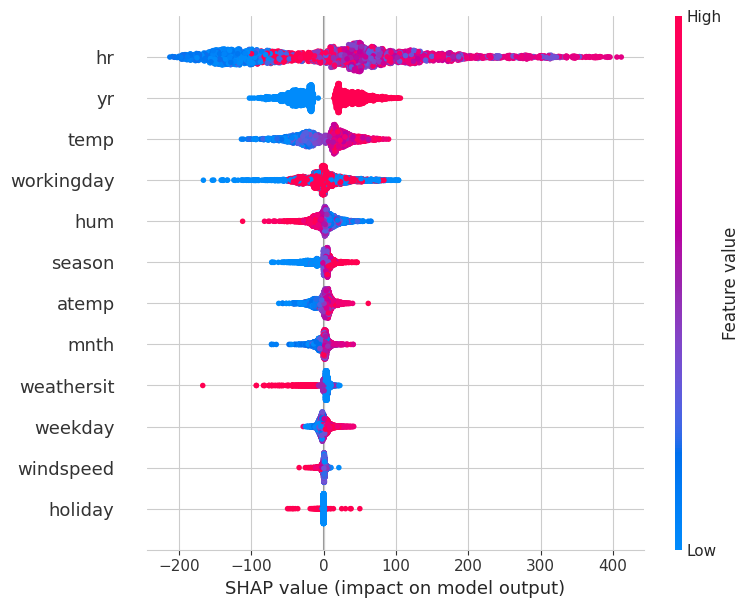

In [14]:
import shap

model_to_explain = trained_models['Random Forest']
explainer = shap.Explainer(model_to_explain, X_test)
shap_values = explainer(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test)


Here, we can see that the hour feature of the data has the most contribution, followed by the year. The beeswarm plot for the hour is quite complex as there are uses in the morning and in the afternoon. This makes sense as we have seen in the analysis above that 2012 has higher values of users and there are certain times of the day that users tend to use the bike.

After the year feature, we can see that temperature is the next contributor, where high values of temperature result in more bike usage.

# **Summary and Conclusions**

I performed data cleaning, visualization, modeling and analysis on the Bike Sharing in Washington D.C dataset. I was able to explore the dataset and found that there was an increase in bike users from 2011 to 2012. I also found that registered users tend to use the bikes more for weekday transporation, while casual users use it on weekends. Several factors influence when the people would use their bikes. For instance, I found that as the windspeed increases, the number of bike users decreased.

Because of that, I tested several machine learning models to determine which gives the best score for three metrics: R squared, MAE, and RMSE. I found that Random Forest outperformed Linear Regression, Decision Tree Regressor,Gradient Boosting, K-Nearest Neighbor, Support Vector Regressor, and Multilayer Perceptron Regressor for all the three metrics.

Using SHAP, I found that the top three that contributed the most in the model's predictions are hour, year, and temperature.

### **Recommendations**

As I have mentioned before, the limitations of this analysis is the arbitrarily chosen parameters for the models. I recommend the use of tools such as GridSearchCV to determine which parameters would give the best metric values. I also recommend to do a SHAP analysis on the overall dataset.

From my findings, I recommend that data from several other years should be taken into account to see the temporal yearly pattern. A conclusion cannot be made per year, most especially with the seasons and weather data as they have a yearly seasonality.
